In [19]:
library(tidyr)
library(ggplot2)
library(ggpubr)
library(dplyr)

In [20]:
df<-read.csv("05_Correlation_Analysis/selected_pairs_set1.csv",check.names = FALSE)

In [21]:
names(df)[is.na(names(df)) | names(df) == ""] <- paste0("V", which(is.na(names(df)) | names(df) == ""))

In [22]:
df_filtered <- df %>% filter(rowSums(is.na(.)) == 0)

In [23]:
df_filtered$variable<-factor(df_filtered$variable,levels=c('Unstimulated-IFNg- IL4+ CD27+ CM Memory CD4+',"IgG2_to_Total_Ratio_D7_Phuket_2020-2021"))

In [24]:
write.csv(df_filtered %>% select(subjectGuid,Cytokine_Profiling_IL4_4hr,variable,value) ,
          "/home/workspace/Source_Data/Fig5j_2.csv", row.names=FALSE)

`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'


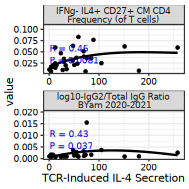

In [25]:


options(repr.plot.width = 40/25.4, repr.plot.height =  40/25.4)

p <- ggplot(df_filtered, aes(x = `Cytokine_Profiling_IL4_4hr`, y = value)) +
  geom_point(size = 0.6, stroke = 0.25) +
  geom_smooth(method = 'loess', color = "black", se = FALSE,span = 1.8, linewidth = 0.5) +
  stat_cor(
    method = "spearman",
    aes(label = paste0("R = ", ..r.., "\nP = ", ..p..)),
    label.x.npc = "left", 
    label.y.npc = "top",   output.type = "text",
color ="blue",
    size = 1.76
  ) +
  facet_wrap(~ variable, ncol = 1, scales = "free",labeller = labeller(variable = c(
      "IgG2_to_Total_Ratio_D7_Phuket_2020-2021"="log10-IgG2/Total IgG Ratio\n BYam 2020-2021",
      "Unstimulated-IFNg- IL4+ CD27+ CM Memory CD4+"="IFNg- IL4+ CD27+ CM CD4\nFrequency (of T cells)"
  ))) +
  theme_bw(base_size = 6) + scale_y_continuous(expand = expansion(mult = c(0.05, 0.35))) + theme(
  axis.title   = element_text(color = "black"),
  axis.text    = element_text(color = "black"),
    strip.text.x      = element_text(margin = margin(t = 1, b = 1))


)+xlab("TCR-Induced IL-4 Secretion")

p
ggsave('FigureJ1.pdf',
       p, 
       width = 45/25.4,
       height = 40/25.4)

In [26]:
df<-read.csv("05_Correlation_Analysis/selected_pairs_set2.csv",check.names = FALSE)

In [27]:
names(df)[is.na(names(df)) | names(df) == ""] <- paste0("V", which(is.na(names(df)) | names(df) == ""))
df_filtered <- df %>% filter(rowSums(is.na(.)) == 0)

In [30]:
df_filtered$RNA_Age_Metric_Up_CM_CD4T<-df_filtered$`CompositeScore_Up_CM CD4 T cell`
write.csv(df_filtered %>% select(subjectGuid,RNA_Age_Metric_Up_CM_CD4T	,variable,value) ,
          "/home/workspace/Source_Data/Fig5j_1.csv", row.names=FALSE)

`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'


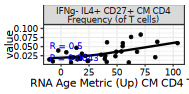

In [31]:


options(repr.plot.width = 40/25.4, repr.plot.height =  20/25.4)

p <- ggplot(df_filtered, aes(x = `CompositeScore_Up_CM CD4 T cell`, y = value)) +
  geom_point(size = 0.6, stroke = 0.25) +
  geom_smooth(method = 'loess', color = "black", se = FALSE,span = 1.8, linewidth = 0.5) +
  stat_cor(
    method = "spearman",
    aes(label = paste0("R = ", ..r.., "\nP = ", ..p..)),
    label.x.npc = "left", 
    label.y.npc = "top",   output.type = "text",
color ="blue",
    size = 1.76
  ) +
  facet_wrap(~ variable, ncol = 1, scales = "free",labeller = labeller(variable = c(
      "Unstimulated-IFNg- IL4+ CD27+ CM Memory CD4+"="IFNg- IL4+ CD27+ CM CD4\nFrequency (of T cells)"
  ))) +
  theme_bw(base_size = 6) + scale_y_continuous(expand = expansion(mult = c(0.05, 0.35))) + theme(
  axis.title   = element_text(color = "black"),
  axis.text    = element_text(color = "black"),
    strip.text.x      = element_text(margin = margin(t = 1, b = 1))


)+xlab("RNA Age Metric (Up) CM CD4 T ")

p
ggsave('FigureJ2.pdf',
       p, 
       width = 45/25.4,
       height = 20/25.4)